# An Analysis of Movie Performance, Part 2: Data Analysis and Presentation

In this part, you’ll use the datasets you gathered in Part 1 to explore what makes a movie successful. You’ll perform exploratory data analysis, create visualizations, and, where appropriate, fit simple statistical models.

The main goal is to discover patterns and communicate them clearly, not just to crunch numbers.

**Learning Objectives**  
By the end of this part, you should be able to:  
* Combine and clean multiple real-world datasets from different sources.  
* Conduct exploratory data analysis (EDA) with pandas and visualization libraries.  
* Apply basic statistical modeling to test hypotheses.  
* Communicate insights effectively to a non-technical audience.

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from IPython.core.display import HTML
import pandas as pd
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns

1. **Exploratory Analysis**  
Begin by understanding your dataset as a whole. Look for trends, outliers, and relationships.  

    Examples of questions to explore:  
    * How popular is each genre over the last decade?
    * How do budget and revenue vary by year or by genre?  
    * What is the average profit margin (revenue - budget) across genres or years?  
    * How do movie ratings (vote average) relate to box-office performance?  
    * Adjust all financial metrics (budget and revenue) for inflation to 2024 dollars using CPI data.

    Deliverables:  
    * At least 3-4 clearly labeled visualizations (bar charts, scatter plots, or boxplots).  

#### import and clean data

In [2]:
movie_dataset= pd.read_csv('../data/movies_2015_2024.csv')
movie_dataset.head(3)

,Unnamed: 0,Year,Data,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres,budget,revenue
0,0,2015,"{'adult': False, 'backdrop_path': '/kIBK5SKwgq...",False,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,11.8411,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,2015-04-22,Avengers: Age of Ultron,False,7.271,23847,"['Action', 'Adventure', 'Science Fiction']",365000000,1405403694
1,1,2015,"{'adult': False, 'backdrop_path': '/gqrnQA6Xpp...",False,/gqrnQA6Xppdl8vIb2eJc58VC1tW.jpg,"[28, 12, 878]",76341,en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,10.6392,/hA2ple9q4qnwxp3hKVNhroipsir.jpg,2015-05-13,Mad Max: Fury Road,False,7.627,23503,"['Action', 'Adventure', 'Science Fiction']",150000000,378858340
2,2,2015,"{'adult': False, 'backdrop_path': '/jJKZaTBNen...",False,/jJKZaTBNenlFclQyjrnvzkRmvWE.jpg,"[16, 10751, 12, 18, 35]",150540,en,Inside Out,"When 11-year-old Riley moves to a new city, he...",13.9604,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,2015-06-17,Inside Out,False,7.910,22917,"['Animation', 'Family', 'Adventure', 'Drama', ...",175000000,857611174


In [3]:
##Clean up the dataframe to only have the columns with relevant data 
movie_dataset.columns
movie_dataset= movie_dataset[['Year', 'adult', 'original_language', 'original_title', 'popularity', 'vote_average', 'vote_count', 'genres', 'budget', 'revenue']]
movie_dataset.head(3)

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue
0,2015,False,en,Avengers: Age of Ultron,11.8411,7.271,23847,"['Action', 'Adventure', 'Science Fiction']",365000000,1405403694
1,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,"['Action', 'Adventure', 'Science Fiction']",150000000,378858340
2,2015,False,en,Inside Out,13.9604,7.910,22917,"['Animation', 'Family', 'Adventure', 'Drama', ...",175000000,857611174


### How popular is each genre over the years?

#### Clean up genre column of dataframe

In [4]:
#clean up genre column -> strip the square paranthesize and organize the groups 
#movie_dataset['genres'][0].replace('[', '').replace(']', '').replace("'", '').split(',')
#update the column with the new cleaner text 
#movie_dataset['genres'][0].replace('[', '').replace(']', '').replace("'", '').split(',')

clean_genre_info= []
count_genre_group= []
for row in movie_dataset['genres']:
    clean_genre= row.replace('[', '').replace(']', '').replace("'", '').split(',')
    clean_genre_info.append(clean_genre)
    count_genre_group.append(len(clean_genre))

movie_dataset['genres']= clean_genre_info
movie_dataset['n_genres']= count_genre_group
movie_dataset.head(3)

#explode the dataframe so each row only has one genre, but all genre info is kept for each movie
movie_genre_clean= movie_dataset.explode('genres')
movie_genre_clean.head(10)

#clean up genre test so it organizes correctly
movie_genre_clean['genres']= movie_genre_clean['genres'].str.lstrip().str.rstrip().str.lower()

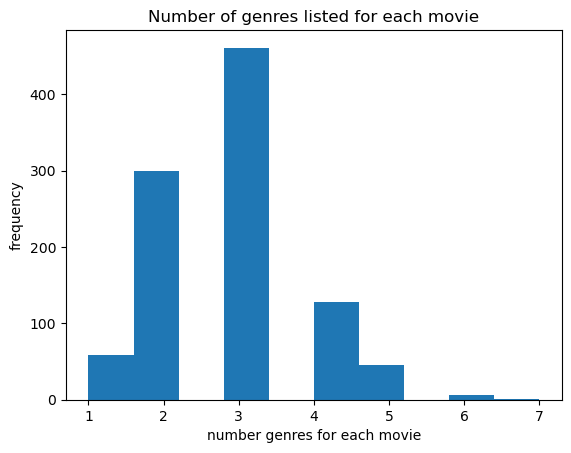

In [5]:
#visualize the number of genres for each movie, distribution 
fig, ax= plt.subplots()
ax.hist(movie_dataset['n_genres']);
ax.set_title('Number of genres listed for each movie');
ax.set_ylabel('frequency');
ax.set_xlabel('number genres for each movie');

##### What are the most common genre combinations (aka those genres will be overrepresented)

In [6]:
movie_genre_clean.groupby('original_title')['genres'].count()

original_title
#살아있다                                        3
10 Cloverfield Lane                          4
12 Strong                                    4
13 Hours: The Secret Soldiers of Benghazi    5
1917                                         4
                                            ..
기생충                                          3
반도                                           4
부산행                                          4
아가씨                                          3
헤어질 결심                                       3
Name: genres, Length: 999, dtype: int64

---

In [7]:
#explode the dataframe so each row only has one genre, but all genre info is kept for each movie
movie_genre_clean= movie_dataset.explode('genres')
movie_genre_clean.head(10)

#clean up genre test so it organizes correctly
movie_genre_clean['genres']= movie_genre_clean['genres'].str.lstrip().str.rstrip().str.lower()

### How popular is each genre over the last decade?

In [8]:
#popular by number of movies? Or popular by vote count? or populat by 'popularity' metric?

In [9]:
movie_genre_clean.groupby(['genres', 'Year'])['popularity'].mean()

genres   Year
action   2015    8.023700
         2016    6.176611
         2017    6.736766
         2018    9.575884
         2019    6.864686
                   ...   
western  2016    6.431050
         2017    5.072700
         2018    4.518700
         2020    5.782200
         2021    5.118500
Name: popularity, Length: 168, dtype: float64

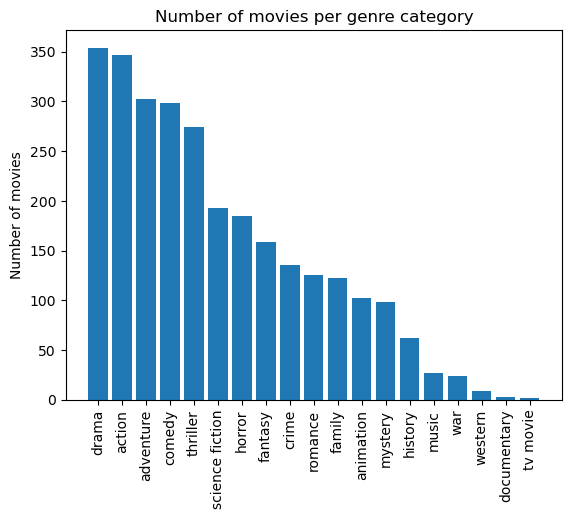

In [10]:
genre_counts= movie_genre_clean['genres'].value_counts()
plt.bar(genre_counts.index, genre_counts);
plt.xticks(rotation=90);
plt.ylabel('Number of movies');
plt.title('Number of movies per genre category');

In [11]:
top_ten_genre= genre_counts.nlargest(10)
top_ten_genre.index

Index(['drama', 'action', 'adventure', 'comedy', 'thriller', 'science fiction',
       'horror', 'fantasy', 'crime', 'romance'],
      dtype='object', name='genres')

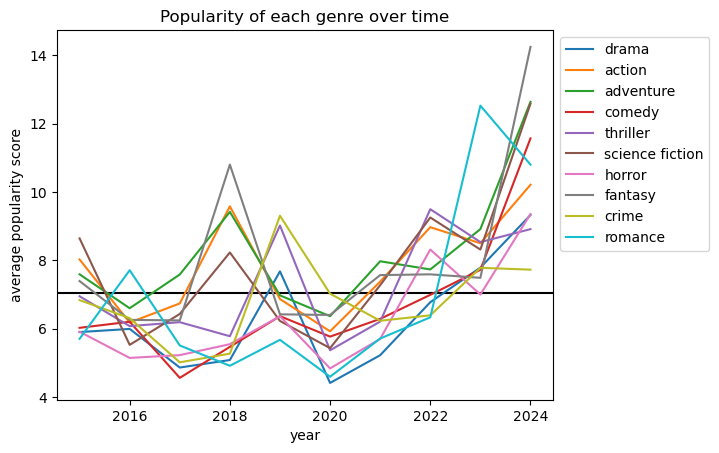

In [12]:
##filter out just the top 10 genres with the most movies 
top_ten_genre= genre_counts.nlargest(10)
top_ten_genre.index

#create a list of genres
genre_list= movie_genre_clean['genres'].unique().tolist()
genre_list

#determine the average popuarity across all movies 
avg_pop= movie_dataset['popularity'].mean().round(2)
avg_pop

fig, ax= plt.subplots()
ax.axhline(y=avg_pop, color='k') #create a vertlical line that is the average poularity score for ALL movies
ax.set_ylabel('average popularity score')
ax.set_xlabel('year')
ax.set_title('Popularity of each genre over time')
#create a for loop for graphing- groupby each genre and create a linegraph
for genre in top_ten_genre.index:
    #create a filtered dataframe for each genre
    genre_pop_time= movie_genre_clean[movie_genre_clean['genres'] == genre]

    #get the data for the graph by groupby year, and calculating mean and sem
    plot_summary= genre_pop_time.groupby('Year')['popularity'].agg(['mean', 'sem'])

    #make a line graph 
    ax.plot(plot_summary.index, plot_summary['mean'], label= genre)
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [13]:
genre_year= movie_genre_clean.groupby(['Year', 'genres'])['popularity'].mean()
year_index= genre_year.index.get_level_values('Year')
genre_index= genre_year.index.get_level_values('genres')
genre_year

Year  genres         
2015  action              8.023700
      adventure           7.587822
      animation           7.012943
      comedy              6.023040
      crime               6.833654
                           ...    
2024  mystery             8.286720
      romance            10.796537
      science fiction    12.580771
      thriller            8.910000
      war                 8.476600
Name: popularity, Length: 168, dtype: float64

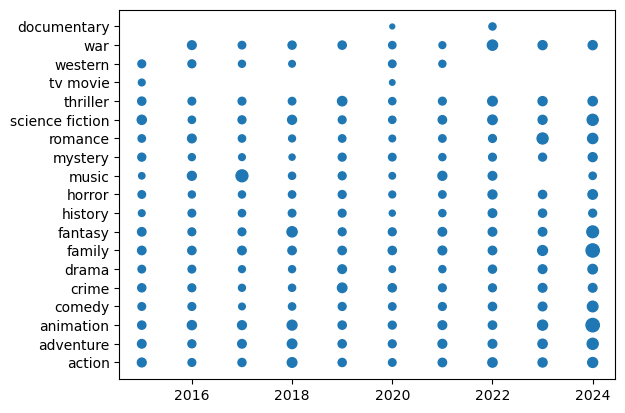

In [14]:
movie_genre_clean.head(3)

plt.scatter(year_index, genre_index, sizes= genre_year*5)

In [15]:
best_picture= pd.read_csv('../data/best_pictures_sm.csv')
best_picture

,Unnamed: 0,Year of Film Release,Film,winner_status
0,0,1927/28,Wings,True
1,1,1927/28,7th Heaven,False
2,2,1927/28,The Racket,False
3,4,1928/29,The Broadway Melody,True
4,5,1928/29,Alibi,False
...,...,...,...,...
606,43,2024,Emilia Pérez,False
607,44,2024,I'm Still Here,False
608,45,2024,Nickel Boys,False
609,46,2024,The Substance,False


In [16]:
movie_genre_clean

combine_winner= pd.merge(movie_genre_clean, best_picture[['Film', 'winner_status']], left_on='original_title', right_on='Film', how='left')
len(combine_winner.groupby('Film')['Film'].count())

83

-----

exploratory questions: How does budget impact popularity?

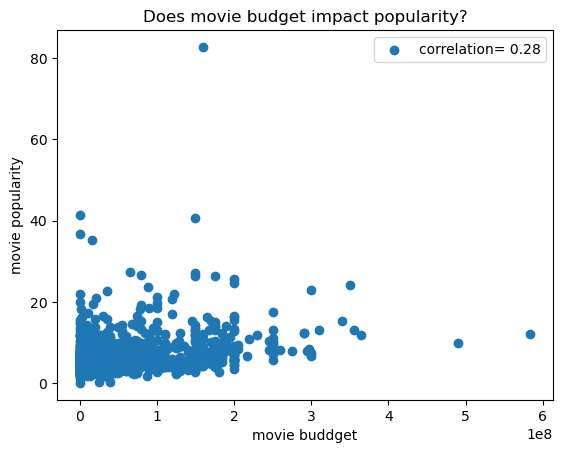

In [17]:
movie_dataset

correlation_coef= movie_dataset['budget'].corr(movie_dataset['popularity']);
plt.scatter(movie_dataset['budget'], movie_dataset['popularity'], label=f'correlation= {correlation_coef.round(2)}');
plt.ylabel('movie popularity');
plt.xlabel('movie buddget');
plt.title('Does movie budget impact popularity?');
plt.legend()
#plt.annotate(text= f'correlation ({correlation_coef.round(2)})', xy=(6, 100))

-----

2. **Performance Comparisons**  
    Use your merged dataset to examine whether recognition and awards are associated with better performance.  
    Investigate:  
    * Do Best Picture nominees or winners tend to earn higher box-office revenue than non-nominated movies?  
    * Are certain genres or types of roles more common among award-winning films?
    * (If you did the optional scrape) Do movies featuring a Best Actor or Best Actress winner in their cast tend to perform better?  
  
    Deliverables:  
    * At least one regression model 

## popularity or vote average -> predict revenue or winner_status?

### import dataframe where movie picture winners is included as a column

In [18]:
movie_genre_clean
combine_winner_genre= pd.merge(movie_genre_clean, best_picture[['Film', 'winner_status']], left_on='original_title', right_on='Film', how='left')
len(combine_winner_genre.groupby('Film')['Film'].count())

combine_winner.head(3)
combine_winner_genre['winner_status']=combine_winner_genre['winner_status'].fillna('false')
combine_winner.sample(10)

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue,n_genres,Film,winner_status
2516,2023,False,en,Nimona,3.5502,7.867,1270,adventure,0,0,7,NaN,NaN
964,2018,False,en,First Man,3.5339,7.042,5475,drama,70000000,105713218,2,NaN,NaN
1679,2020,False,en,I Still Believe,5.5679,7.600,1206,romance,12000000,16069730,3,NaN,NaN
1754,2021,False,en,Nobody,13.6497,7.901,7856,thriller,16000000,57512470,2,NaN,NaN
838,2017,False,en,The Big Sick,2.7482,7.332,2540,comedy,5000000,56303596,3,NaN,NaN
350,2016,False,en,The Jungle Book,7.7618,6.866,8314,adventure,175000000,966550600,3,NaN,NaN
816,2017,False,en,Going in Style,3.4793,6.691,2925,crime,25000000,84618541,2,NaN,NaN
1203,2019,False,en,Glass,4.6563,6.665,8831,science fiction,20000000,246999039,3,NaN,NaN
608,2017,False,en,Jumanji: Welcome to the Jungle,5.1349,6.819,14122,comedy,90000000,995339117,5,NaN,NaN
846,2017,False,en,The Mountain Between Us,2.1200,6.652,2471,adventure,35000000,62832209,3,NaN,NaN


In [19]:
only_nom= combine_winner.dropna(subset='Film')
only_nom

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue,n_genres,Film,winner_status
3,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,action,150000000,378858340,3,Mad Max: Fury Road,False
4,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,adventure,150000000,378858340,3,Mad Max: Fury Road,False
5,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,science fiction,150000000,378858340,3,Mad Max: Fury Road,False
15,2015,False,en,The Martian,9.0021,7.690,20579,drama,108000000,631058917,3,The Martian,False
16,2015,False,en,The Martian,9.0021,7.690,20579,adventure,108000000,631058917,3,The Martian,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,2024,False,fr,Emilia Pérez,3.4456,6.511,1832,thriller,26000000,16302703,2,Emilia Pérez,False
2734,2024,False,en,The Brutalist,10.8172,7.000,1393,drama,9600000,50145227,2,The Brutalist,False
2735,2024,False,en,The Brutalist,10.8172,7.000,1393,history,9600000,50145227,2,The Brutalist,False
2768,2024,False,en,A Complete Unknown,7.0319,7.114,1247,drama,65000000,138003641,2,A Complete Unknown,False


In [20]:
only_nom

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue,n_genres,Film,winner_status
3,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,action,150000000,378858340,3,Mad Max: Fury Road,False
4,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,adventure,150000000,378858340,3,Mad Max: Fury Road,False
5,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,science fiction,150000000,378858340,3,Mad Max: Fury Road,False
15,2015,False,en,The Martian,9.0021,7.690,20579,drama,108000000,631058917,3,The Martian,False
16,2015,False,en,The Martian,9.0021,7.690,20579,adventure,108000000,631058917,3,The Martian,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,2024,False,fr,Emilia Pérez,3.4456,6.511,1832,thriller,26000000,16302703,2,Emilia Pérez,False
2734,2024,False,en,The Brutalist,10.8172,7.000,1393,drama,9600000,50145227,2,The Brutalist,False
2735,2024,False,en,The Brutalist,10.8172,7.000,1393,history,9600000,50145227,2,The Brutalist,False
2768,2024,False,en,A Complete Unknown,7.0319,7.114,1247,drama,65000000,138003641,2,A Complete Unknown,False


#### Does genre predict winner status?

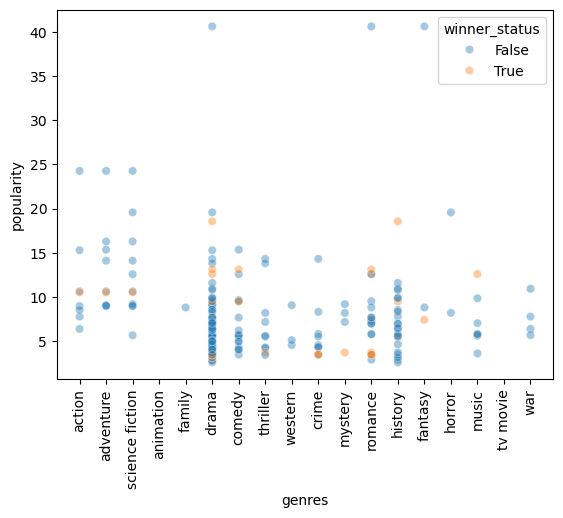

In [21]:
combine_winner
import seaborn as sns 
sns.scatterplot(x=combine_winner['genres'], y=combine_winner['popularity'], hue=combine_winner['winner_status'], alpha=0.4);
plt.xticks(rotation=90);

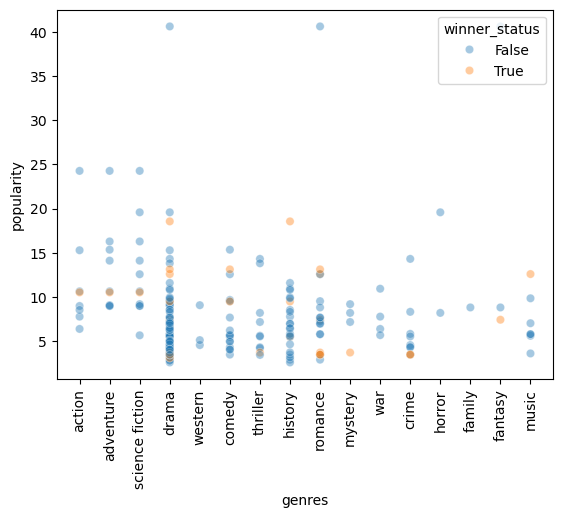

In [22]:
combine_winner
import seaborn as sns 
sns.scatterplot(x=only_nom['genres'], y=only_nom['popularity'], hue=only_nom['winner_status'], alpha=0.4);
plt.xticks(rotation=90);

## popularity or vote average -> predict revenue or winner_status?

In [23]:
best_picture.head(3)

,Unnamed: 0,Year of Film Release,Film,winner_status
0,0,1927/28,Wings,True
1,1,1927/28,7th Heaven,False
2,2,1927/28,The Racket,False


In [24]:
movie_dataset

movie_dataset_winner= pd.merge(movie_dataset, best_picture[['Film', 'winner_status']], left_on='original_title', right_on='Film', how='left')
movie_dataset_winner['winner_status']=movie_dataset_winner['winner_status'].fillna('not nominated')
movie_dataset_winner

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue,n_genres,Film,winner_status
0,2015,False,en,Avengers: Age of Ultron,11.8411,7.271,23847,"[Action, Adventure, Science Fiction]",365000000,1405403694,3,NaN,not nominated
1,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,"[Action, Adventure, Science Fiction]",150000000,378858340,3,Mad Max: Fury Road,False
2,2015,False,en,Inside Out,13.9604,7.910,22917,"[Animation, Family, Adventure, Drama, Comedy]",175000000,857611174,5,NaN,not nominated
3,2015,False,en,Jurassic World,11.8662,6.700,21094,"[Action, Adventure, Science Fiction, Thriller]",150000000,1671537444,4,NaN,not nominated
4,2015,False,en,The Martian,9.0021,7.690,20579,"[Drama, Adventure, Science Fiction]",108000000,631058917,3,The Martian,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,2024,False,en,Miller's Girl,3.8256,6.348,880,"[Thriller, Drama, Romance]",4000000,1430985,3,NaN,not nominated
999,2024,False,pt,Ainda Estou Aqui,4.4395,7.951,861,"[Drama, History]",1480000,36109482,2,NaN,not nominated
1000,2024,False,en,Love Lies Bleeding,8.0038,6.572,856,"[Crime, Romance, Thriller, Drama]",10000000,12778225,4,NaN,not nominated
1001,2024,False,en,Arthur the King,3.2761,7.577,855,"[Adventure, Drama]",19000000,40829138,2,NaN,not nominated


### Relationship between 'popularity' and 'vote average'

C:\Users\Mullo\anaconda3\Lib\site-packages\matplotlib\text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\Mullo\anaconda3\Lib\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
C:\Users\Mullo\anaconda3\Lib\site-packages\matplotlib\text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\Mullo\anaconda3\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._

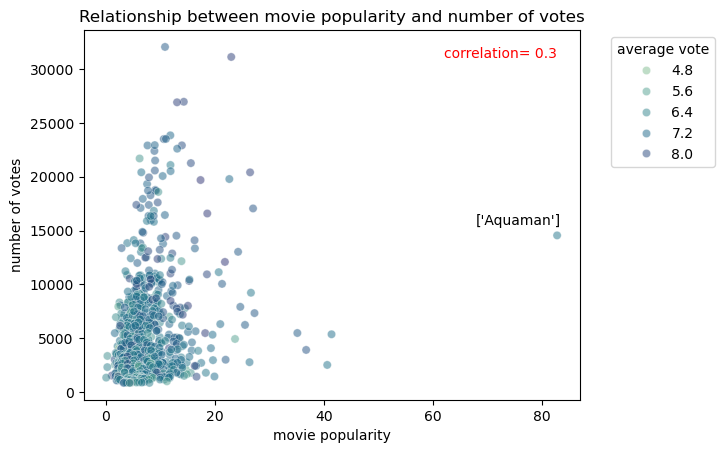

In [32]:

fig_title='Relationship between movie popularity and number of votes'
fig_name= 'corr movie pop and nvote w outlier.png'
x_value= movie_dataset['popularity']
xlabel_text='movie popularity'

y_value= movie_dataset['vote_count']
ylabel_text= 'number of votes'

hue_value= movie_dataset['vote_average']
hue_label='average vote'
color_map_choice= "crest"
alpha_choice= 0.5

###make plot
movie_dataset
sns.scatterplot(x= x_value, 
                y= y_value, 
                hue= hue_value, 
                palette=color_map_choice, 
                alpha= alpha_choice);

### put note for the weird outlier point 
outlier_name= movie_dataset[movie_dataset['popularity'] >= 80]['original_title']
outlier_x= movie_dataset[movie_dataset['popularity'] >= 80]['popularity']
outlier_y=movie_dataset[movie_dataset['popularity'] >= 80]['vote_count']
plt.annotate(text = outlier_name.tolist(), xy = (outlier_x-15,outlier_y+1000));

#Make the coefficent 
corr_coef= x_value.corr(y_value)
plt.text(x_value.max(), 
         y_value.max(), 
         f'correlation= {corr_coef.round(2)}', 
         ha='right', 
            va='top', 
            color='red');

#figure formatting
plt.legend(title=hue_label, 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left');
plt.ylabel(ylabel_text);
plt.xlabel(xlabel_text);
plt.title(fig_title);

plt.savefig('../figures/'+ fig_name,
            bbox_inches='tight')

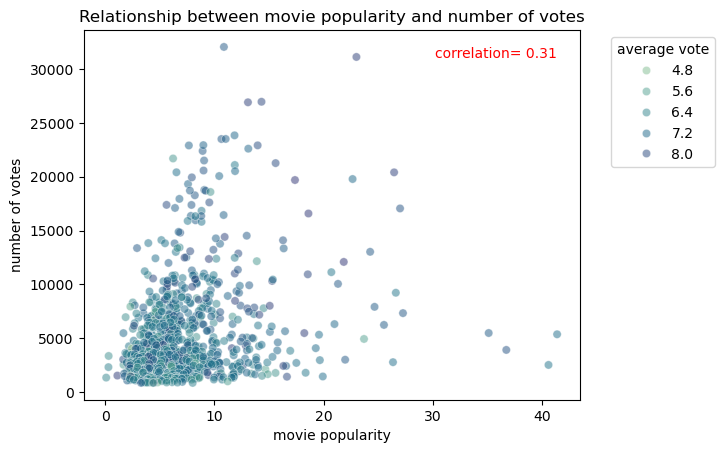

In [33]:
##remove the outlier
movie_clean= movie_dataset[movie_dataset['popularity'] <= 50]
###

fig_title='Relationship between movie popularity and number of votes'
fig_name= 'corr movie pop and nvote.png'
x_value= movie_clean['popularity']
xlabel_text='movie popularity'

y_value= movie_clean['vote_count']
ylabel_text= 'number of votes'

hue_value= movie_clean['vote_average']
hue_label='average vote'
color_map_choice= "crest"
alpha_choice= 0.5

###make plot
movie_dataset
sns.scatterplot(x= x_value, 
                y= y_value, 
                hue= hue_value, 
                palette=color_map_choice, 
                alpha= alpha_choice);

#Make the coefficent 
corr_coef= x_value.corr(y_value)
plt.text(x_value.max(), y_value.max(), f'correlation= {corr_coef.round(2)}', ha='right', va='top', color='red')

#figure formatting
plt.legend(title=hue_label, 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left');
plt.ylabel(ylabel_text);
plt.xlabel(xlabel_text);
plt.title(fig_title);
plt.savefig('../figures/'+ fig_name, bbox_inches='tight')

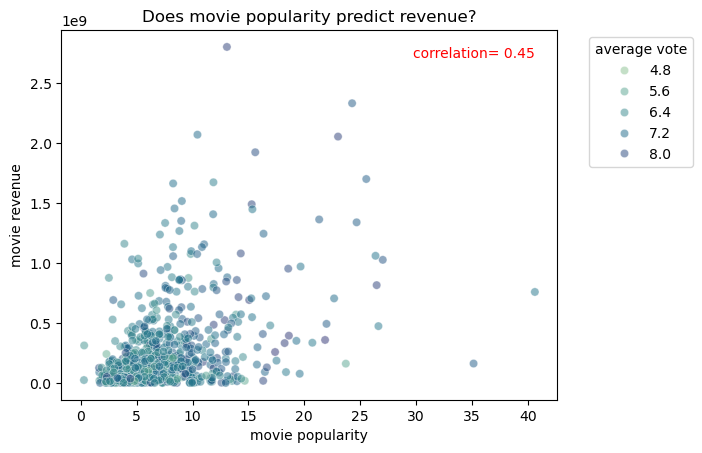

In [34]:
##remove the outlier
movie_clean= movie_dataset[movie_dataset['popularity'] <= 50]
movie_clean= movie_clean[movie_clean['revenue']!=0]
###

fig_title='Does movie popularity predict revenue?'
fig_name= 'corr pop and revenue.png'
x_value= movie_clean['popularity']
xlabel_text='movie popularity'

y_value= movie_clean['revenue']
ylabel_text= 'movie revenue'

hue_value= movie_clean['vote_average']
hue_label='average vote'
color_map_choice= "crest"
alpha_choice= 0.5

###make plot
movie_dataset
sns.scatterplot(x= x_value, 
                y= y_value, 
                hue= hue_value, 
                palette=color_map_choice, 
                alpha= alpha_choice);

#Make the coefficent 
corr_coef= x_value.corr(y_value)
plt.text(x_value.max(), y_value.max(), f'correlation= {corr_coef.round(2)}', ha='right', va='top', color='red')

#figure formatting
plt.legend(title=hue_label, 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left');
plt.ylabel(ylabel_text);
plt.xlabel(xlabel_text);
plt.title(fig_title);
plt.savefig('../figures/'+ fig_name, bbox_inches='tight')

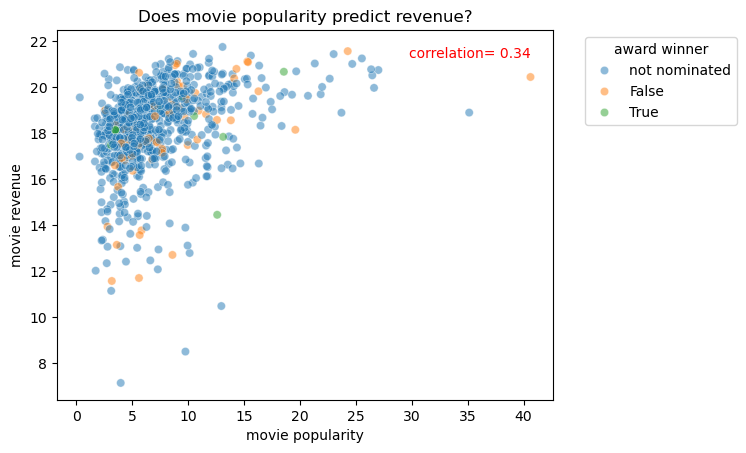

In [35]:
##remove the outlier
movie_clean= movie_dataset_winner[movie_dataset_winner['popularity'] <= 50]
movie_clean= movie_clean[movie_clean['revenue']!=0]
###

fig_title='Does movie popularity predict revenue?'
fig_name= 'log popularity and revenue x winner status.png'
x_value= movie_clean['popularity']
xlabel_text='movie popularity'

y_value= np.log1p(movie_clean['revenue'])
ylabel_text= 'movie revenue'

hue_value= movie_clean['winner_status']
hue_label='award winner'
#color_map_choice= 
alpha_choice= 0.5

###make plot
movie_dataset
sns.scatterplot(x= x_value, 
                y= y_value, 
                hue= hue_value, 
                
                alpha= alpha_choice);
#palette=color_map_choice, 

#Make the coefficent 
corr_coef= x_value.corr(y_value)
plt.text(x_value.max(), y_value.max(), f'correlation= {corr_coef.round(2)}', ha='right', va='top', color='red')

#figure formatting
plt.legend(title=hue_label, 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left');
plt.ylabel(ylabel_text);
plt.xlabel(xlabel_text);
plt.title(fig_title);
plt.savefig('../figures/'+ fig_name, bbox_inches='tight')

### Does popularity predict award performance?

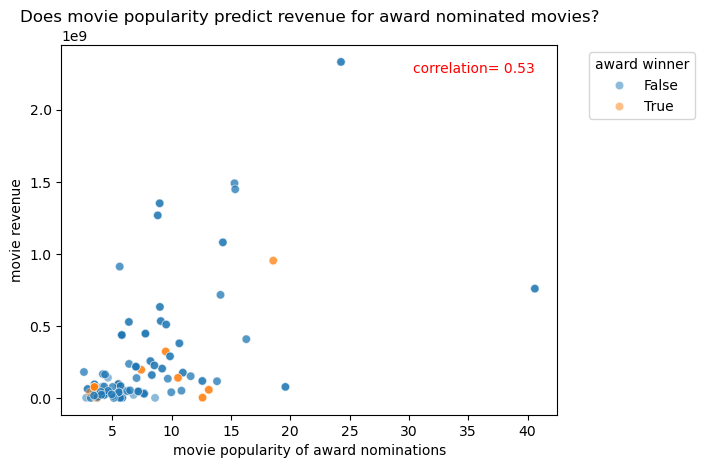

In [38]:
fig_title='Does movie popularity predict revenue for award nominated movies?'
fig_name= 'award winner- pop coorelate revenue.png'
x_value= only_nom['popularity']
xlabel_text='movie popularity of award nominations'

y_value= only_nom['revenue']
ylabel_text= 'movie revenue'

hue_value= only_nom['winner_status']
hue_label='award winner'
#color_map_choice= 
alpha_choice= 0.5

###make plot
movie_dataset
sns.scatterplot(x= x_value, 
                y= y_value, 
                hue= hue_value, 
                
                alpha= alpha_choice);
#palette=color_map_choice, 

#Make the coefficent 
corr_coef= x_value.corr(y_value)
plt.text(x_value.max(), y_value.max(), f'correlation= {corr_coef.round(2)}', ha='right', va='top', color='red')

#figure formatting
plt.legend(title=hue_label, 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left');
plt.ylabel(ylabel_text);
plt.xlabel(xlabel_text);
plt.title(fig_title);
plt.savefig('../figures/'+ fig_name, bbox_inches='tight')

In [30]:
movie_dataset_winner.head(3)
only_nom.head(5)

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue,n_genres,Film,winner_status
3,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,action,150000000,378858340,3,Mad Max: Fury Road,False
4,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,adventure,150000000,378858340,3,Mad Max: Fury Road,False
5,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,science fiction,150000000,378858340,3,Mad Max: Fury Road,False
15,2015,False,en,The Martian,9.0021,7.690,20579,drama,108000000,631058917,3,The Martian,False
16,2015,False,en,The Martian,9.0021,7.690,20579,adventure,108000000,631058917,3,The Martian,False


### linear regression: Does movie popularity predict revenue?

In [40]:
import statsmodels.formula.api as smf

In [39]:
movie_clean= movie_dataset_winner[movie_dataset_winner['popularity'] <= 50]
movie_clean= movie_clean[movie_clean['revenue']!=0]
movie_clean.head(3)



,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue,n_genres,Film,winner_status
0,2015,False,en,Avengers: Age of Ultron,11.8411,7.271,23847,"[Action, Adventure, Science Fiction]",365000000,1405403694,3,NaN,not nominated
1,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,"[Action, Adventure, Science Fiction]",150000000,378858340,3,Mad Max: Fury Road,False
2,2015,False,en,Inside Out,13.9604,7.910,22917,"[Animation, Family, Adventure, Drama, Comedy]",175000000,857611174,5,NaN,not nominated


In [54]:
model_pop_rev = smf.ols("revenue~ popularity", data=movie_clean).fit()
model_pop_rev.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     209.1
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           1.92e-42
Time:                        13:41:26   Log-Likelihood:                -17446.
No. Observations:                 834   AIC:                         3.490e+04
Df Residuals:                     832   BIC:                         3.491e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.327e+07   1.98e+07     -0.669      0.504   -5.22e+07    2.56e+07
popularity  3.444e+07   2.38e+06     14.460      0.000    2.98e+07    3.91e+07
==============================================================================
Omnibus:                      474.828   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4576.920
Skew:                           2.435   Prob(JB):                         0.00
Kurtosis:                      13.392   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
pred_df = pd.DataFrame(
    {
        'popularity': np.linspace(start=movie_clean['popularity'].min(), stop=movie_clean['popularity'].max())
    }
)

pred_df['mean_estimate'] = model_pop_rev.predict(pred_df)
pred_df.head(2)
model_rsquare= model_pop_rev.rsquared.round(3)

TypeError: plot() got an unexpected keyword argument 'x'

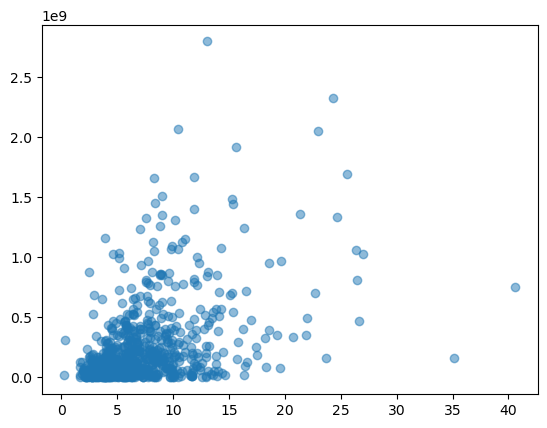

In [66]:
fig, ax = plt.subplots()
ax.scatter(x=movie_clean["popularity"], y=movie_clean["revenue"], alpha=0.5)
ax.plot(x=pred_df["popularity"], y=pred_df["mean_estimate"], color="black");
ax.set_title("Does movie popularity predict revenue?");
ax.text(movie_clean['popularity'].max(), movie_clean['revenue'].max(), f'rsquare= {model_rsquare}', ha='right', va='top', color='red')

### r-squared-> poplarity accounts for 20% of variation in revenue -> it is significant, but does not explain the majority of the variation in revenue. So there are potentially other factors that could be better used to explain revenue"

### Popularity does impact revenue, but it is not the main predictor since it only accounts for 20% of the variablility in revenue

3. **Presentation**  
    Prepare a 10-12 minute presentation of your findings.  
    Your presentation should:  
    * Focus on findings and insights, not code.  
    * Tell a clear story: the questions you asked and what you found.  
    * Include visuals such as charts, summary tables, or model results.
    * Avoid screenshots of code or raw output. Think of your audience as studio executives or film analysts, not programmers.

    Your presentation should be done using PowerPoint/Google Slides or other presentation software.